In [78]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [79]:
from preprocess import load_graph

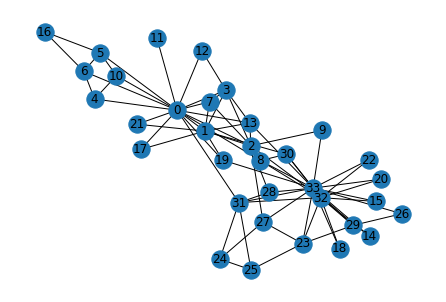

In [80]:
G = load_graph('karate')
pos = nx.spring_layout(G)
nx.draw(G, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [81]:
# trying to implement some link reconstruction
n = G.number_of_nodes()
m = G.number_of_edges()
print(f'Number of nodes is {n}')
print(f'Number of edges is {m}')
print(f'Number of connected components are {nx.number_connected_components(G)}')

Number of nodes is 34
Number of edges is 78
Number of connected components are 1


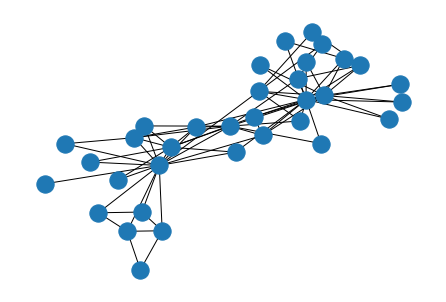

In [82]:
#plt.figure(figsize=(12,8))
nx.draw(G)

In [83]:
import random

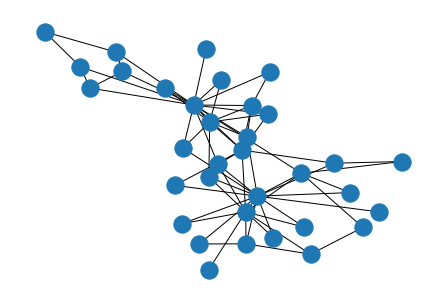

In [84]:
# take a random sample of edges
edge_subset = random.sample(G.edges(), int(0.1 * G.number_of_edges()))
# remove edges
G_train = G.copy()
G_train.remove_edges_from(edge_subset)
nx.draw(G_train)

In [85]:
edge_subset_size = len(list(edge_subset))
print(f'Deleted: {edge_subset_size}')
print(f'Remaining: {m-edge_subset_size}')

Deleted: 7
Remaining: 71


In [86]:
# jaccard_coeffecient
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])
score[0:4]

(0.125, 0.14814814814814814, 0.058823529411764705, 0.0)

In [87]:
label[0:4]

(False, False, False, False)

In [88]:
prediction_jaccard[:4]

[(0, 32, 0.125),
 (0, 33, 0.14814814814814814),
 (0, 9, 0.058823529411764705),
 (0, 14, 0.0)]

In [89]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])
prediction_adamic[0:6]

[(0, 32, 1.6345651744242777),
 (0, 33, 2.7110197222973085),
 (0, 9, 0.45511961331341866),
 (0, 14, 0),
 (0, 15, 0),
 (0, 16, 1.8204784532536746)]

In [90]:
score[0:6]

(1.6345651744242777,
 2.7110197222973085,
 0.45511961331341866,
 0,
 0,
 1.8204784532536746)

In [91]:
label[0:6]

(False, False, False, False, False, False)

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
fpr_adamic, tpr_adamic, _ =  roc_curve(label, score)
auc_adamic = roc_auc_score(label, score)
auc_adamic

0.6755397811298433

In [94]:
fpr_adamic

array([0.        , 0.00207039, 0.01449275, 0.01449275, 0.02070393,
       0.03312629, 0.03726708, 0.03726708, 0.04347826, 0.06004141,
       0.08074534, 0.11387164, 0.15320911, 0.1552795 , 0.16149068,
       0.16563147, 0.18012422, 0.20910973, 0.2484472 , 0.36438923,
       0.51138716, 1.        ])

In [95]:
tpr_adamic

array([0.        , 0.        , 0.        , 0.14285714, 0.14285714,
       0.14285714, 0.14285714, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.28571429, 0.42857143, 0.42857143, 0.57142857, 0.71428571,
       0.71428571, 1.        ])

TypeError: 'float' object cannot be interpreted as an integer

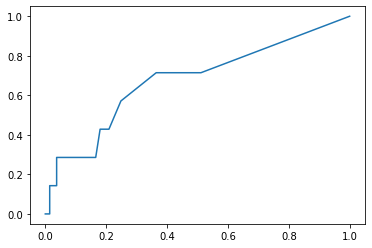

In [96]:
plt.plot(fpr_adamic, tpr_adamic, label='adamic')
plt.plot(np.arange(0.0, 1.0, 0.01), np.arange(0.0, 1.0, 0.01), label='baseline')